#  <center> Problem Set 2 <center>
<center> 3.C01/3.C51, 7.C01/7.C51, 10.C01/10.C51, 20.C01/20.C51<center>

<b>Name:</b>

<b>Kerberos id:</b>

### Download required data & install packages

In [ ]:
! wget https://raw.githubusercontent.com/coleygroup/ML4MolEng/main/psets/ps3/data/dna_binding.csv
!wget https://raw.githubusercontent.com/coleygroup/ML4MolEng/main/psets/ps5/data/bubble_segmentation_jpeg.tar.gz
!tar -xf bubble_segmentation_jpeg.tar.gz

--2025-03-06 17:56:47--  https://raw.githubusercontent.com/coleygroup/ML4MolEng/main/psets/ps3/data/dna_binding.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1408340 (1.3M) [text/plain]
Saving to: ‘dna_binding.csv’

dna_binding.csv     100%[===================>]   1.34M  --.-KB/s    in 0.1s    

2025-03-06 17:56:47 (12.7 MB/s) - ‘dna_binding.csv’ saved [1408340/1408340]

--2025-03-06 17:56:47--  https://raw.githubusercontent.com/coleygroup/ML4MolEng/main/psets/ps5/data/bubble_segmentation_jpeg.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
import os
import glob
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import imageio
from skimage import io, color

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as transforms
from torch import nn
from torchvision.models import vgg16
import torch.optim as optim

## <center>Problem 1: Predicting DNA Binding Sites</center>

In [ ]:
df = pd.read_csv("./dna_binding.csv")

sequences = df.seq.values
y = df.bind.values

### 1.1 (10 points) Build Datasets and DataLoaders in PyTorch

One-hot encode DNA sequence data.


In [ ]:
def SeqEnc(sequences):
    '''
    A function to one-hot encode DNA sequences

    Args:
        sequences (list): list of DNA sequences

    Returns:
        np.array: array with shape (N,C,4) where N is the number of sequences
        and C is the sequence length
    '''
    ################ Code #################


    ################ Code #################

Shape of X is (12904, 101, 4).


Implement your dataset class that takes in your data.

In [ ]:
# Generate dataset
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(np.array(X))  # store X as a pytorch Tensor
        self.y = torch.Tensor(np.array(y))  # store y as a pytorch Tensor
        self.len=len(self.X)                # number of samples in the data

    def __getitem__(self, index):
        # your implementation here:


    def __len__(self):
        return self.len

Define your Datasets and DataLoaders.

In [ ]:
# Define dataset
X_train = None # fill in code here
y_train = None # fill in code here
X_val = None # fill in code here
y_val = None # fill in code here
X_test = None # fill in code here
y_test = None # fill in code here

#Build Dataset
train_data = None # fill in code here
val_data = None # fill in code here
test_data = None # fill in code here

# Build DataLoader
batch_size = 256
train_loader = None # fill in code here
val_loader = None # fill in code here
test_loader = None # fill in code here

What is the benefit of batching your data into mini-batches versus using the entire dataset to optimize the model all at once?

In [ ]:
################ Answer #################

################ Answer #################

### 1.2 (20 points) Build an LSTM-based binding classifier

The following example will help familiarize you with the LSTM.

In [ ]:
# Define a LSTM module
lstm_model = nn.LSTM(input_size=4, hidden_size=16, num_layers=1, batch_first=True, bidirectional=True).to("cpu") # "cpu" is the device id

# Send your batch to a GPU
X_batch, y_batch = next(iter(train_loader))
X_batch = X_batch.to("cpu")
y_batch = y_batch.to("cpu")

# Propagate your batch into your model
lstm_out, (ht, ct) = lstm_model(X_batch)
print(lstm_out.shape, ht.shape, ct.shape)

# You can play with hyperparameters to see how your output change

Now build your LSTM-based classifier as a nn.Module.

In [ ]:
class LSTMseq(torch.nn.Module) :
    def __init__(self, input_dim, hidden_dim) :
        super().__init__()

        # Define a LSTM module

        # Define a MLP regressor

        # Define a sigmoid transform

    def forward(self, x):

        # Apply LSTM

        # Pass output into a MLP

        # Transform output into probabilites

        # Return probabilities
        proba = None

        return proba

In [ ]:
# Test your ouput on a batch
clf = LSTMseq(input_dim=4, hidden_dim=16).to('cpu')
print(clf(X_batch).shape)

### 1.3 (20 points) Implement functions for training and testing

The training and validation loops and evaluation function.

In [ ]:
def train(model, dataloader, optimizer, device):

    '''
    A function to train on the entire dataset for one epoch.

    Args:
        model (torch.nn.Module): Your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer): Optimizer object to interface gradient calculation and optimization
        device (str): Your device

    Returns:
        float: loss averaged over all the batches

    '''

    batch_loss = []
    model.train() # Set model to training mode

    for batch in dataloader:
        seq, label = batch
        seq = seq.to(device)
        label = label.to(device)

        # train your model on each batch here

    return 0.0


def validate(model, dataloader, device):

    '''
    A function to validate on the validation dataset for one epoch.

    Args:
        model (torch.nn.Module): Your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the validation data
        device (str): Your device

    Returns:
        float: loss averaged over all the batches

    '''

    val_loss = []
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        for batch in dataloader:
            seq, label = batch
            seq = seq.to(device)
            label = label.to(device)

            # validate your model on each batch here

    return 0.0

def evaluate(model, dataloader, device):

    '''
    A function to return the classification probabilities and true labels (for evaluation).

    Args:
        model (torch.nn.Module): your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        device (str): Your device

    Returns:
        (np.array, np.array): true labels, predicted probabilities
    '''

    pred_prob = []
    labels = []
    with torch.no_grad():
        model.eval()
        for batch in dataloader:
            epoch_loss = []
            seq, label = batch

            seq = seq.to(device)
            label = label.to(device)

            # evaluate your model here

    return labels, pred_prob

In [ ]:
device = 'cuda:0'
model = LSTMseq(4, 16).to(device)

optimizer = torch.optim.Adam(list(model.parameters()), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, factor=0.5)

val_loss_curve = []
train_loss_curve = []

# Use tqdm for progress bar
tqdm_progress =  tqdm(range(500), desc="Progress")

for epoch in tqdm_progress:
    # Compute train your model on training data
    epoch_loss = train(model, train_loader, optimizer,  device=device)

    # Validate your on validation data
    val_loss = validate(model, val_loader, device=device)

    # Record train and loss performance
    train_loss_curve.append(epoch_loss)
    val_loss_curve.append(val_loss)

    # The learning rate scheduler record the validation loss
    scheduler.step(val_loss)
    tqdm_progress.set_postfix(train_loss=f'{epoch_loss:.3f}', val_loss=f'{val_loss:.3f}', refresh=True)

## Part 2: Image Segmentation

### 2.1 (15 points) Build Datasets and DataLoaders

Parse data from image filepaths.

In [ ]:
paths = [path for path in glob.glob("bubble_segmentation/*") if "bubbles" in path]

def load_img(path):
    x = np.array(Image.open(path)) / 255
    y = np.array(Image.open(path.replace("bubbles","masks"))) / 255
    return x, y

Load one image.

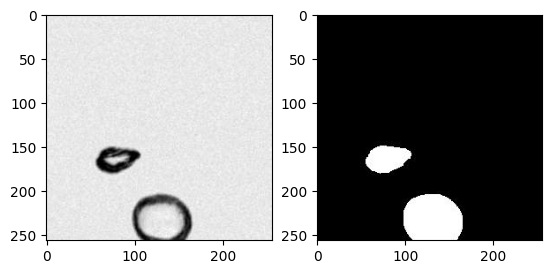

In [ ]:
idx = 20
cells, masks = load_img(paths[idx])
fig, axes = plt.subplots(1,2)
axes[0].imshow(cells, cmap='gray')
axes[1].imshow(masks, cmap='gray')

Your ImageDataset class.

In [ ]:
################ Code #################

Split your data and load your DataLoaders.

In [ ]:
################ Code #################

Is it necessary to apply random translation to your images?  Briefly justify your answer.

In [ ]:
############### Answer #################

### 2.2 (20 points) Train a U-Net Model that Performs Image Segmentation

Implement Dice loss.

In [ ]:
def dice_loss(pred, target):
    """Calculate Dice loss.

    Parameters
    ----------
        pred:
            predictions from the model
        target:
            ground truth label
    """

################ Code #################

The U-Net Model.

In [ ]:
class DownSampling(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, name=None):
        super(DownSampling, self).__init__()

        self.conv = ConvBlock(in_channels, out_channels, kernel_size)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):

        conv_out = self.conv(x)
        output = self.max_pool(conv_out)

        return output, conv_out


class UpSampling(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, name=None):
        super(UpSampling, self).__init__()

        self.conv = ConvBlock(in_channels, out_channels, kernel_size)
        self.conv_t = nn.ConvTranspose2d(out_channels, out_channels, kernel_size, \
                                         padding=1, stride=2, output_padding=1)


    def forward(self, x, skip):

        conv_out = self.conv(x)
        output = self.conv_t(conv_out)

        output += skip

        return output


class ConvBlock(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, padding=1, stride=1, name=None):
        super(ConvBlock, self).__init__()

        block = []
        # first conv layer
        block.append(nn.Conv2d(in_channels, out_channels, kernel_size, \
                               padding=padding, stride=stride))
        block.append(nn.ReLU())
        block.append(nn.BatchNorm2d(out_channels))

        # second conv layer
        block.append(nn.Conv2d(out_channels, out_channels, kernel_size, \
                               padding=padding, stride=stride))
        block.append(nn.ReLU())
        block.append(nn.BatchNorm2d(out_channels))

        # make sequential
        self.conv_block = nn.Sequential(*block)


    def forward(self, x):

        output = self.conv_block(x)

        return output


class UNet(nn.Module):

    def __init__(self, num_kernel=8, kernel_size=3, dim=1, target_dim=1):
        """UNet

        Arguments:
            num_kernel: int
                number of kernels to use for the first layer
            kernel_size: int
                size of the kernel for the first layer
            dims: int
                number of color channels for input images
            target_dim: int
                number of channels for the output mask
        """

        super(UNet, self).__init__()

        self.num_kernel = num_kernel
        self.kernel_size = kernel_size
        self.dim = dim
        self.target_dim = 1

        # encode
        self.encode_1 = DownSampling(self.dim, num_kernel, kernel_size)
        self.encode_2 = DownSampling(num_kernel, num_kernel*2, kernel_size)
        self.encode_3 = DownSampling(num_kernel*2, num_kernel*4, kernel_size)
        self.encode_4 = DownSampling(num_kernel*4, num_kernel*8, kernel_size)

        # bridge
        self.bridge = nn.Conv2d(num_kernel*8, num_kernel*16, kernel_size, padding=1, stride=1)

        # decode
        self.decode_4 = UpSampling(num_kernel*16, num_kernel*8, kernel_size)
        self.decode_3 = UpSampling(num_kernel*8, num_kernel*4, kernel_size)
        self.decode_2 = UpSampling(num_kernel*4, num_kernel*2, kernel_size)
        self.decode_1 = UpSampling(num_kernel*2, num_kernel, kernel_size)

        self.segment = nn.Conv2d(num_kernel, self.target_dim, 1, padding=0, stride=1)
        self.activate = nn.Sigmoid()


    def forward(self, x):

        has_channel = x.ndim == 4
        if not has_channel:
            x = x.unsqueeze(1)

        x, skip_1 = self.encode_1(x)
        x, skip_2 = self.encode_2(x)
        x, skip_3 = self.encode_3(x)
        x, skip_4 = self.encode_4(x)

        x = self.bridge(x)

        x = self.decode_4(x, skip_4)
        x = self.decode_3(x, skip_3)
        x = self.decode_2(x, skip_2)
        x = self.decode_1(x, skip_1)

        x = self.segment(x)

        pred = self.activate(x)

        if not has_channel:
            pred = pred.squeeze(1)

        return pred


    def args_dict(self):
        """model arguments to be saved
        """

        model_args = {'dim': self.dim,
                      'target_dim': self.target_dim,
                      'num_kernel' : self.num_kernel,
                      'kernel_size' : self.kernel_size}

        return model_args

Example model usage.

In [ ]:
model = UNet()
y = model(torch.randn(4, 256, 256))

print(y.shape)

A function to plot a segmentation map.

In [ ]:
def plot_seg(img, pred_seg, true_seg, mask_cutoff=0.5):

    """ Visualize segmentation results.
    Inputs:
        image: orginal image, shape: 256 x 256
        pred_seg: predicted mask, shape: 256 x 256
        true_seg: true mask, shape: 256 x 256
        mask_cutoff: if the mask values is larger than mask_cutoff, the mask will appear on the image
    """
    img = img.squeeze()
    pred_seg = pred_seg.squeeze()
    true_seg = true_seg.squeeze()

    fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')
    fig.set_size_inches((15,15))

    ax[0].set_title("Original Image")
    ax[1].set_title("Prediction")
    ax[2].set_title("Ground Truth")

    img = np.stack([img,img,img],axis = -1)
    ax[0].imshow(img)
    ax[1].imshow(np.clip(color.label2rgb(pred_seg > mask_cutoff,img,colors=[(255,0,0)],alpha=0.0025, bg_label=0, bg_color=None),0,1))
    ax[2].imshow(np.clip(color.label2rgb(true_seg > mask_cutoff,img,colors=[(255,0,0)],alpha=0.0025, bg_label=0, bg_color=None),0,1))

    plt.show()

Train your model.

In [ ]:
################ Code #################

Show segmentation results for 3 images from the test dataset.

In [ ]:
################ Code #################